In [2]:
import os
from stream_fastq import stream_fastq
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

DIR_DAT_RAW  = "/home/jovyan/work/Data/SRR4841864/rawdata"
DIR_DAT_TRIM = "/home/jovyan/work/Data/SRR4841864/trimmed_fastqs/"
DIR_CUR      = "/home/jovyan/work/GitRepo/Duke_CBB520_HW2"

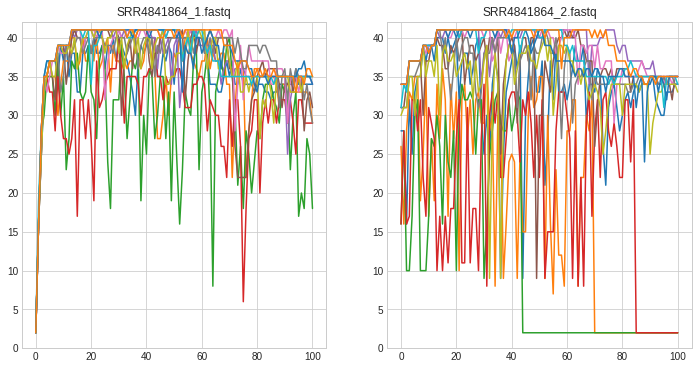

In [5]:
fn   = "SRR4841864_1.fastq"          # file name
fp   = os.path.join(DIR_DAT_RAW, fn) # file path
gen1 = stream_fastq(fp)              # generator

fn   = "SRR4841864_2.fastq"          # file name
fp   = os.path.join(DIR_DAT_RAW, fn) # file path
gen2 = stream_fastq(fp)              # generator

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12,6))
for cnt, reads in enumerate(zip(gen1, gen2)):
    for ax, read in zip(axes, reads):
        qscore  = read["qscore"]
        phred   = [ord(char)-33 for char in qscore]
        ax.plot(phred)
    
    if cnt > 10:
        break

ax1, ax2 = axes
ax1.set_title("SRR4841864_1.fastq")
ax2.set_title("SRR4841864_2.fastq")
ax1.set_ylim([0, 42])
ax2.set_ylim([0, 42])
pass